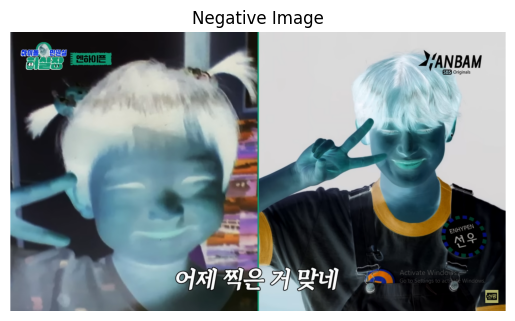

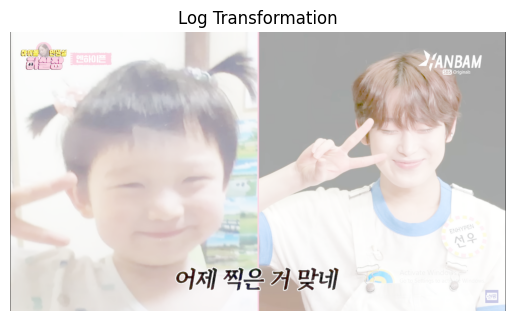

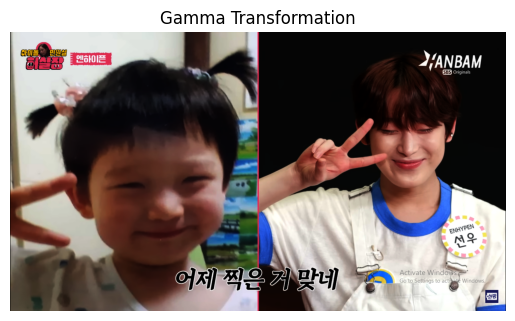

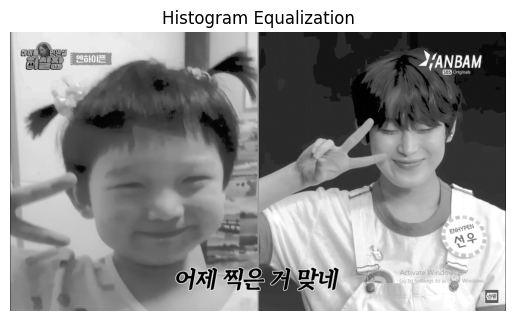

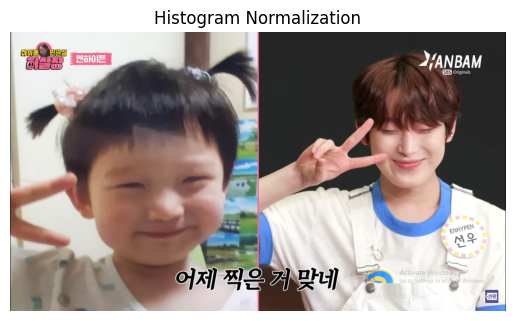

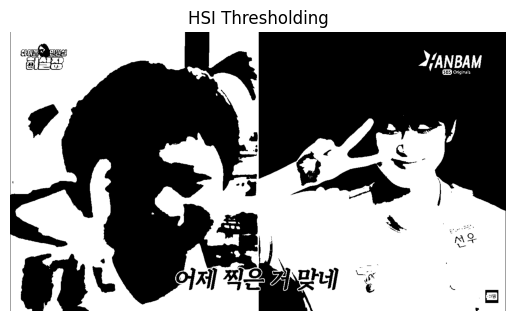

In [2]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image
image = cv2.imread('/content/sample_data/ini.png')  # Replace with your image path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 1. Negative Image
negative_image = 255 - image_rgb

# 2. Log Transformation
c = 255 / np.log(1 + np.max(image_rgb))
log_image = c * (np.log(1 + image_rgb.astype(np.float64)))
log_image = np.uint8(log_image)

# 3. Power-law (Gamma) Transformation
gamma = 2.0
gamma_corrected = np.array(255 * (image_rgb / 255) ** gamma, dtype='uint8')

# 4. Histogram Equalization (Grayscale only)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equalized_image = cv2.equalizeHist(gray_image)

# 5. Histogram Normalization
norm_image = cv2.normalize(image_rgb, None, 0, 255, cv2.NORM_MINMAX)

# 6. RGB to HSI Conversion
def rgb_to_hsi(image):
    image = image.astype(np.float64) / 255
    r, g, b = cv2.split(image)
    intensity = (r + g + b) / 3
    min_rgb = np.minimum(np.minimum(r, g), b)
    saturation = 1 - (3 / (r + g + b + 1e-10)) * min_rgb
    num = 0.5 * ((r - g) + (r - b))
    den = np.sqrt((r - g)**2 + (r - b) * (g - b)) + 1e-10
    theta = np.arccos(num / den)
    hue = np.where(b > g, 2 * np.pi - theta, theta)
    hue = hue / (2 * np.pi)
    hsi_image = cv2.merge([hue, saturation, intensity])
    return hsi_image

hsi_image = rgb_to_hsi(image_rgb)

# Thresholding on Intensity Component
threshold = 0.5
binary_mask = (hsi_image[:, :, 2] > threshold).astype(np.uint8) * 255

# Display Negative Image
plt.imshow(negative_image)
plt.title('Negative Image')
plt.axis('off')
plt.show()

# Display Log Transformation
plt.imshow(log_image)
plt.title('Log Transformation')
plt.axis('off')
plt.show()

# Display Gamma Transformation
plt.imshow(gamma_corrected)
plt.title('Gamma Transformation')
plt.axis('off')
plt.show()

# Display Histogram Equalization
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalization')
plt.axis('off')
plt.show()

# Display Histogram Normalization
plt.imshow(norm_image)
plt.title('Histogram Normalization')
plt.axis('off')
plt.show()

# Display HSI Thresholding
plt.imshow(binary_mask, cmap='gray')
plt.title('HSI Thresholding')
plt.axis('off')
plt.show()
